# Assignment 2

### Q1. Perform data pre-processing steps on the dataset. Handle missing values (if any), explore the correlation between variables, and identify any potential outliers.

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

df = pd.read_excel("ENB2012_data.xlsx")

df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [5]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [6]:
df.isna().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

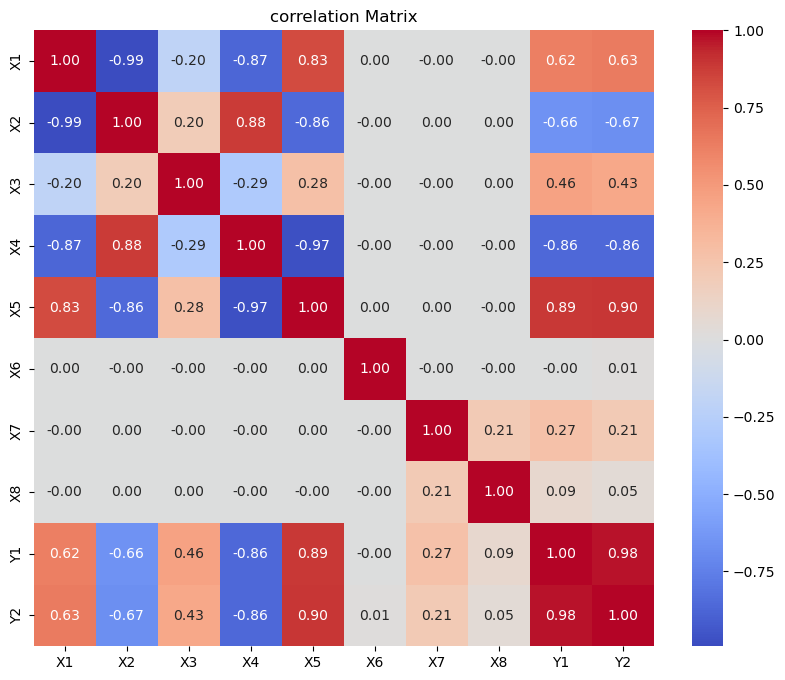

In [7]:
correlation_matrix = df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm',fmt='.2f')
plt.title("correlation Matrix")
plt.show()

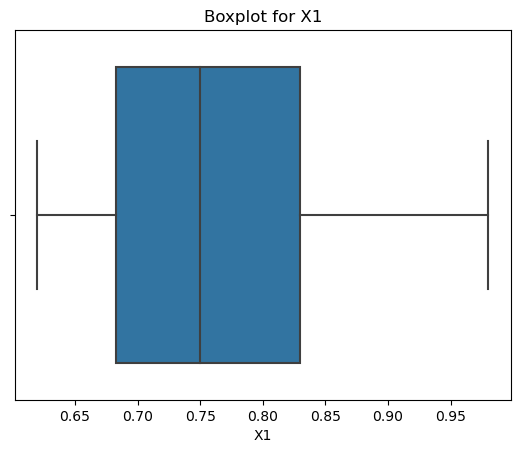

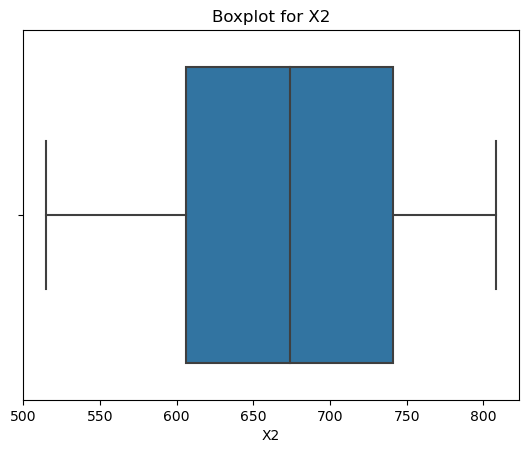

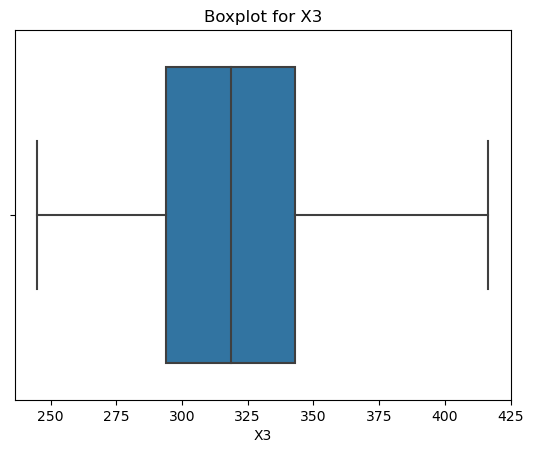

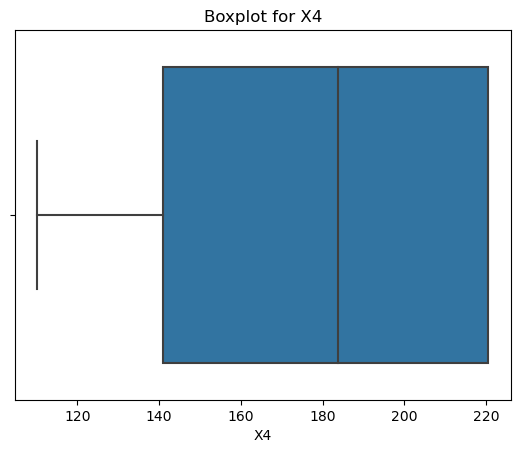

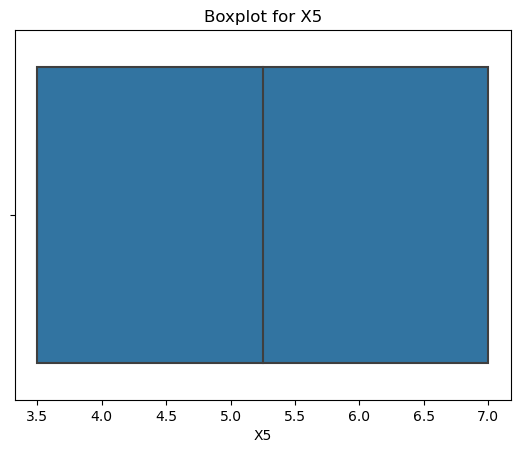

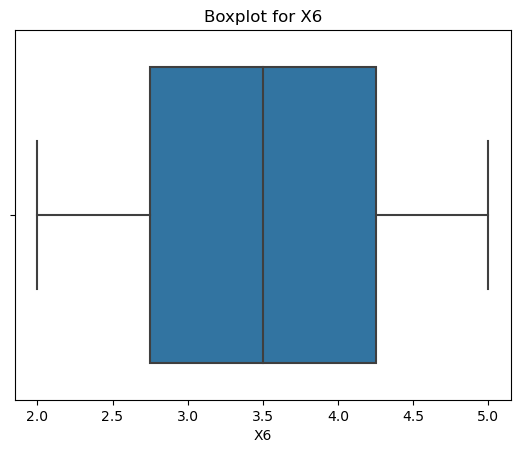

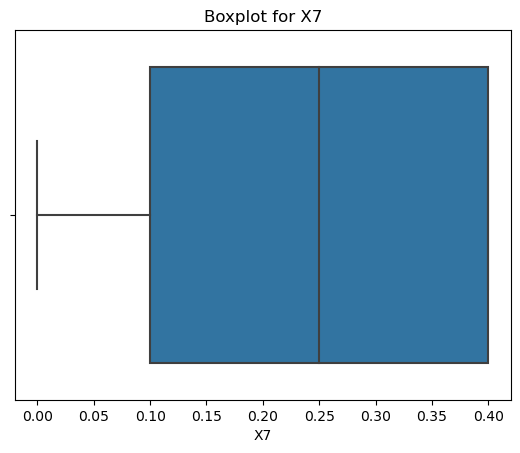

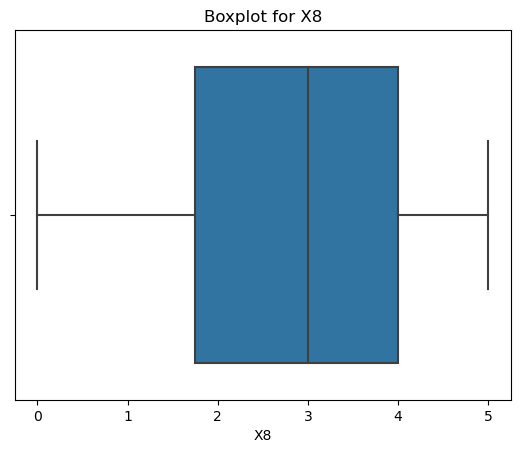

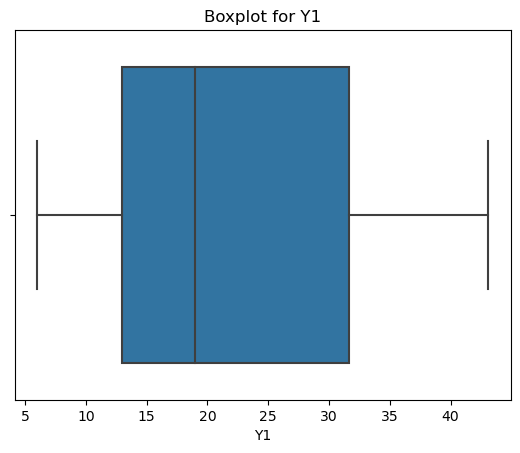

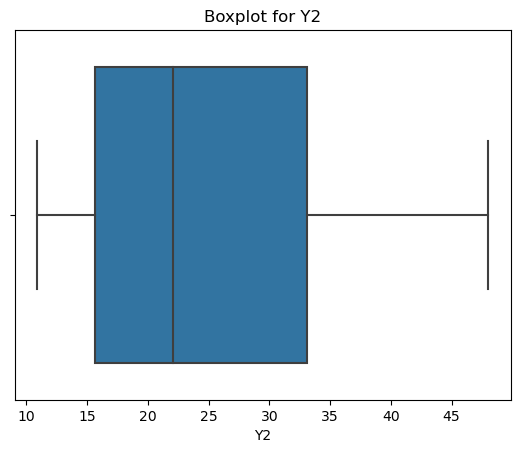

In [8]:
for column in df.select_dtypes(include=np.number).columns:
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot for {column}")
    plt.show()

In [9]:
for column in df.select_dtypes(include=np.number).columns:
    Q1 = df[column].quantile(.25)
    Q3 = df[column].quantile(.75)
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [10]:
for column in df.select_dtypes(include=np.number).columns:
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    
df.describe()


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,7.680000e+02,7.680000e+02,7.680000e+02,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,5.940125e+01,5.940125e+01,5.940125e+01,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,4.977040e-13,4.977040e-13,4.977040e-13,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,5.940125e+01,5.940125e+01,5.940125e+01,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,5.940125e+01,5.940125e+01,5.940125e+01,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,5.940125e+01,5.940125e+01,5.940125e+01,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,5.940125e+01,5.940125e+01,5.940125e+01,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,5.940125e+01,5.940125e+01,5.940125e+01,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


### Q2. Split the dataset into an 80:20 ratio for training and testing using the sklearn library.

In [11]:
from sklearn.model_selection import train_test_split


x = df[['X1','X2','X3','X4','X5','X6','X7','X8']]
y = df['Y1']

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=42)


### Q3. Train a multivariate linear regression model from scratch using numpy, pandas, and matplotlib. Additionally, train a linear regression model using the sklearn library on the training dataset. Also train ridge and lasso regression model using the sklearn library on the training dataset

In [12]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    float64
 6   X7      768 non-null    float64
 7   X8      768 non-null    float64
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(10)
memory usage: 60.1 KB


#### Using SkLearn Library

In [13]:
import scipy as sp
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(x_train, y_train)


LinearRegression()

In [14]:
print(lr.coef_)
print(lr.intercept_)

pred_value_sklearn = lr.predict(x_test)

[-3.44344529e+01  1.35711362e+10  1.35778810e+10  1.35716135e+10
  6.82362556e+00  7.63574988e-03  2.01019572e+01  2.19374225e-01]
-2418856365587.3184


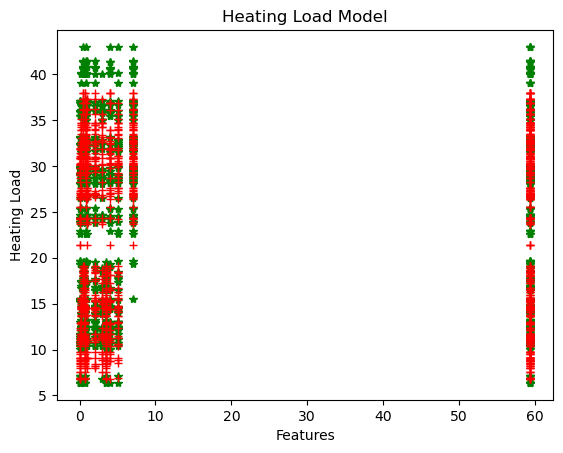

In [15]:
plt.plot(x_test, y_test, "*", color = "green")
plt.plot(x_test, pred_value_sklearn, "+", color = "red")
plt.title("Heating Load Model")
plt.xlabel("Features")
plt.ylabel("Heating Load")
plt.show()

#### Ridge and Lasso Regression Model

Cost_Ridge: 9.9783252744387


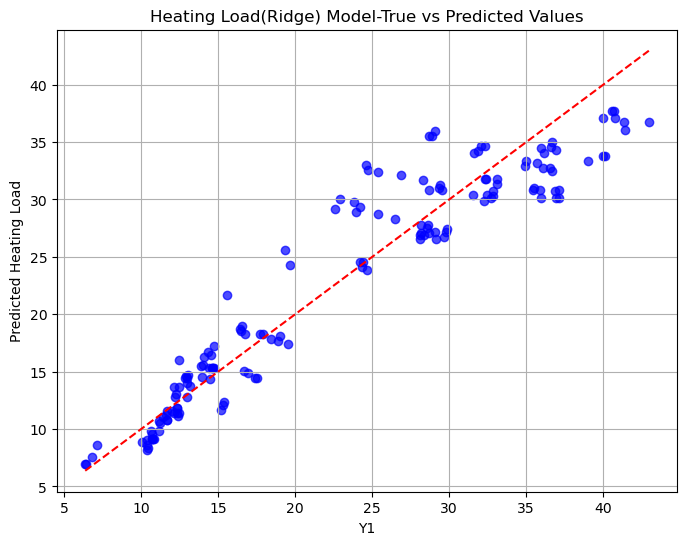

In [16]:
from sklearn.linear_model import Ridge

alpha = 0.1
ridge = Ridge(alpha=alpha)
ridge.fit(x_train,y_train)

prediction_ridge = ridge.predict(x_test)

cost_ridge = mean_squared_error(y_test, prediction_ridge)

print(f"Cost_Ridge: {cost_ridge}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, prediction_ridge, color='blue', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title("Heating Load(Ridge) Model-True vs Predicted Values")
plt.xlabel("Y1")
plt.ylabel("Predicted Heating Load")
plt.grid(True)
plt.show()

Cost_Lasso: 14.197139100387288


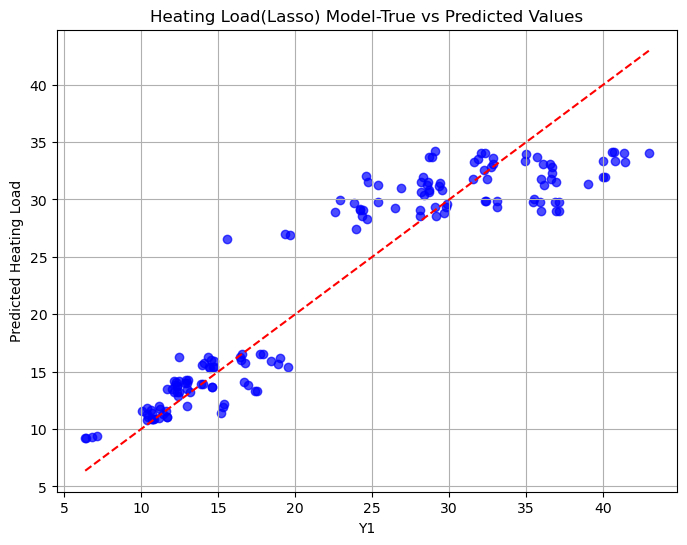

In [17]:
from sklearn.linear_model import Lasso

alpha = 0.1
Lasso = Lasso(alpha=alpha)
Lasso.fit(x_train,y_train)

prediction_Lasso = Lasso.predict(x_test)

cost_Lasso = mean_squared_error(y_test, prediction_Lasso)

print(f"Cost_Lasso: {cost_Lasso}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, prediction_Lasso, color='blue', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title("Heating Load(Lasso) Model-True vs Predicted Values")
plt.xlabel("Y1")
plt.ylabel("Predicted Heating Load")
plt.grid(True)
plt.show()

#### Multivariate Linear Regression Model from Scratch

Learned weights : [ 6.97108307e-04 -3.44344103e+01  4.14091054e-02  4.14091054e-02
  4.14091054e-02  6.82362179e+00  7.63622296e-03  2.01019597e+01
  2.19374559e-01]
Mean Squared Error on Test Set: 9.97


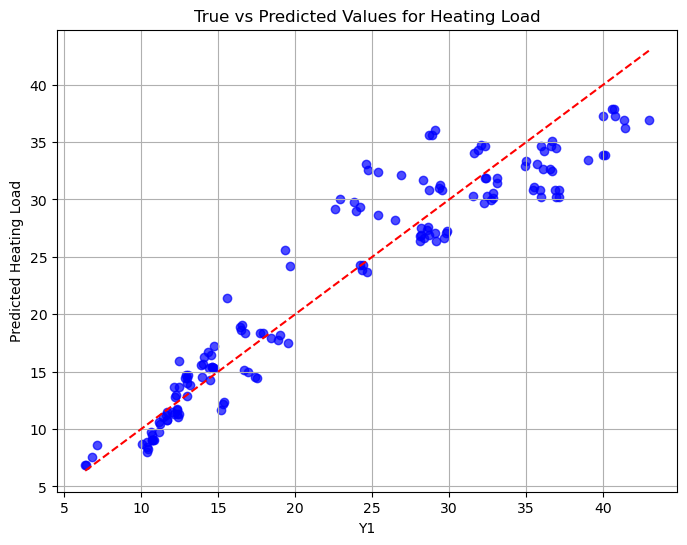

In [18]:
X_train_bias = np.c_[np.ones(x_train.shape[0]), x_train]
X_test_bias = np.c_[np.ones(x_test.shape[0]), x_test]

weights = np.linalg.pinv(X_train_bias.T @ X_train_bias) @ X_train_bias.T @ y_train
print("Learned weights :", weights)

y_pred = X_test_bias @ weights

mse = np.mean((y_pred - y_test) ** 2)
print(f"Mean Squared Error on Test Set: {mse:.2f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('True vs Predicted Values for Heating Load')
plt.xlabel('Y1')
plt.ylabel('Predicted Heating Load')
plt.grid(True)
plt.show()


### Q4. Evaluate the performance for each model on the test dataset using following metrics: R2 score, Mean Squared Error (MSE) and Root Mean Squared Error(RMSE). Compare the performance of the manual model and the sklearn model and plot the predicted vs actual values for both models.

In [19]:
from sklearn.metrics import r2_score

mse_sklearn = mean_squared_error(y_test, pred_value_sklearn)
print(f"MSE_sklearn: {mse_sklearn}")
r2_sklearn = r2_score(y_test,pred_value_sklearn)
print(f"R² Score_sklearn: {r2_sklearn}")
rmse_sklearn = np.sqrt(mse_sklearn)
print(f"RMSE_sklearn: {rmse_sklearn}")

MSE_sklearn: 9.969056550054772
R² Score_sklearn: 0.9043574199354891
RMSE_sklearn: 3.1573812804371237


In [22]:
mse_scratch = mean_squared_error(y_test, y_pred)
print(f"MSE_scratch: {mse_scratch}")
r2_scratch = r2_score(y_test,y_pred)
print(f"R² Score_scratch: {r2_scratch}")
rmse_scratch = np.sqrt(mse_scratch)
print(f"RMSE_scratch: {rmse_scratch}")

MSE_scratch: 9.969599155360177
R² Score_scratch: 0.9043522142100421
RMSE_scratch: 3.1574672057457978


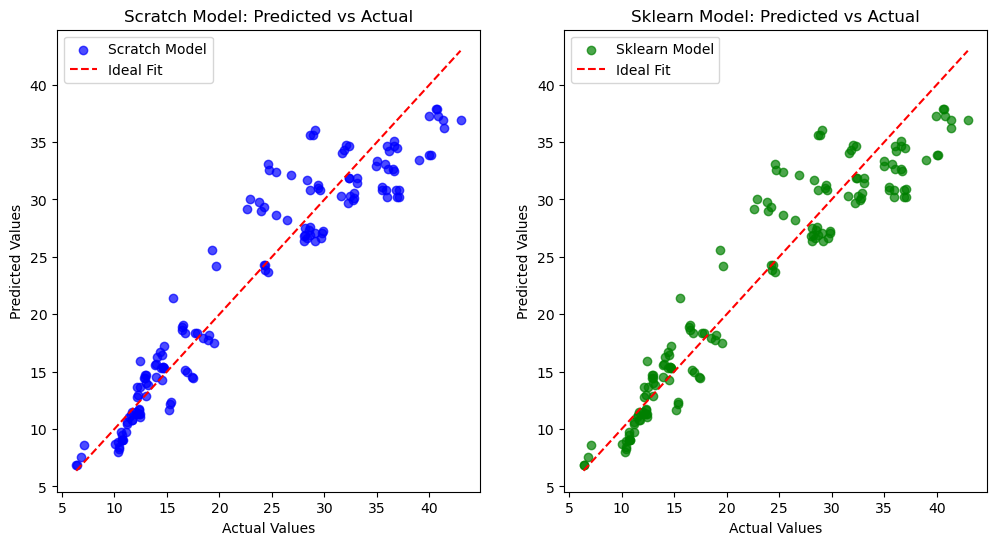

In [21]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='Scratch Model')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scratch Model: Predicted vs Actual')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test, pred_value_sklearn, color='green', alpha=0.7, label='Sklearn Model')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Sklearn Model: Predicted vs Actual')
plt.legend()

### Q5. Propose energy efficiency improvement suggestions based on the insights from the model results, focusing on building design elements that most significantly impact heating load.

Since the correlation of glazing area with heating load is -0.86 , so it means glazing area is highly but inversely correlated with heating load.So, we should increase the glazing area to reduce the heating load.
Orientation has correlation of 0.89 with heating load which means orientation also has a high correlation with heating load. So in winter to reduce heating load we can position the building so that south-facing walls/windows (in the northern hemisphere) receive maximum sunlight during winter. 